##Import the libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### code explanation
The following code performs the following actions:

1.Imports the pandas library and reads in a CSV file named 'Iris.csv' using the **pd.read_csv()** function.

2.Drops the 'Id' column from the DataFrame using the _df.drop()_ method with the axis=1 parameter.

3.Extracts the 'Species' column from the DataFrame and assigns it to the variable 'target'.

4.Initializes an empty set named 's'.

5.Loops through each value in the 'target' column and adds it to the 's' set using the set.add() method. This 
effectively creates a set of unique values in the 'Species' column.

6.Converts the 's' set to a list using the _list()_ function and assigns the resulting list to the 's' variable. This creates a list of unique species names.

7.Creates a list of row indices to drop from the DataFrame using the _list()_ and _range()_ functions. This list contains the integers from 100 to 149.

8.Drops the rows with the specified indices from the DataFrame using the df.drop() method with the index parameter and assigns the resulting DataFrame to the 'df' variable. This effectively removes the last 50 rows from the original DataFrame, which corresponds to the samples of the third species ('Iris virginica').

In [4]:
df = pd.read_csv('C:\\Users\\USER\\OneDrive - Universiti Malaya\\Code\\ML-Things\\learn\\datasets\\Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:  #loop through each value in target
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

This code creates a scatter plot using the matplotlib library, where the x-axis corresponds to the 'SepalLengthCm' column and the y-axis corresponds to the 'PetalLengthCm' column of the DataFrame df. The plot shows the relationship between sepal length and petal length for two species of iris flowers: Setosa (in green) and Versicolor (in red).

The code first creates two new variables, setosa_x and setosa_y, which are slices of the x and y variables, respectively, corresponding to the first 50 rows of the DataFrame. These variables represent the sepal length and petal length of the Setosa flowers.

Then, two more variables are created, versicolor_x and versicolor_y, which are slices of the x and y variables, respectively, corresponding to the remaining rows of the DataFrame (i.e., rows 50 to 99). These variables represent the sepal length and petal length of the Versicolor flowers.

Finally, the scatter plot is created using the plt.scatter() function. The function takes four arguments:

setosa_x and setosa_y: The x and y coordinates for the Setosa flowers.
versicolor_x and versicolor_y: The x and y coordinates for the Versicolor flowers.
marker='+',color='green': The marker style and color for the Setosa flowers.
marker='_',color='red': The marker style and color for the Versicolor flowers.
The resulting plot shows two distinct clusters of points, one corresponding to Setosa flowers (in green) and the other to Versicolor flowers (in red). The plot suggests that there is a positive correlation between sepal length and petal length for both species, but the Versicolor flowers generally have longer petals than the Setosa flowers, even for flowers with similar sepal lengths.

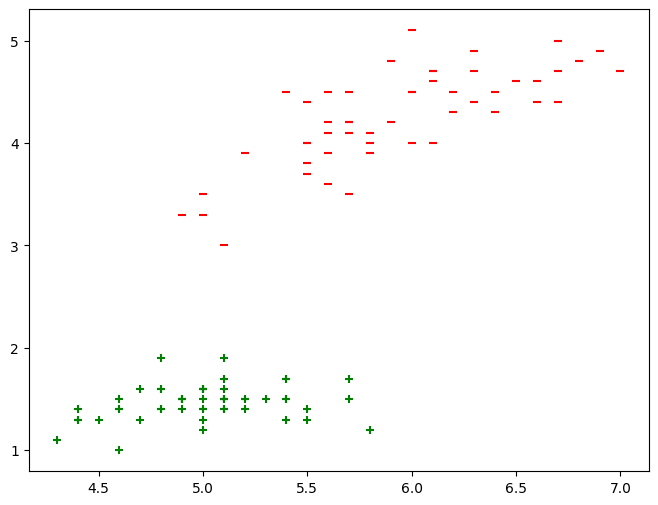

In [5]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split # sklearn.cross_validation is not used anymore 
import numpy as np
#Drop other features 
#Extract target values
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [ ]:
## Support Vector Machine 


train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)       #under numpy
train_f2=train_f2.r

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

In [ ]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append()
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))